In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split

from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

Evaluation:

In [28]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve,auc
import matplotlib.pyplot as plt
import seaborn as sn
import pickle

In [26]:
# Create the confussion matrix
def plot_confussion_matrix(y_test, y_pred):
    ''' Plot the confussion matrix for the target labels and predictions '''
    cm = confusion_matrix(y_test, y_pred)

    # Create a dataframe with the confussion matrix values
    df_cm = pd.DataFrame(cm, range(cm.shape[0]),
                  range(cm.shape[1]))
    #plt.figure(figsize = (10,7))
    # Plot the confussion matrix
    sn.set(font_scale=1.4) #for label size
    sn.heatmap(df_cm, annot=True,fmt='.0f',annot_kws={"size": 10})# font size
    plt.show()
    
# ROC Curve
# plot no skill
# Calculate the points in the ROC curve
def plot_roc_curve(y_test, y_pred):
    ''' Plot the ROC curve for the target labels and predictions'''
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
    roc_auc= auc(fpr,tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [6]:
import os
os.chdir("/content/drive/MyDrive/Thesis/Data/Filled Datasets/Second dataset (Kaggle)/Preprocessed")

import pandas as pd 
train = pd.read_csv("Constraint_Train_fullprep.csv",keep_default_na = False)
test = pd.read_csv("Constraint_Test_fullprep_with_labels.csv",keep_default_na = False,index_col=0)
val = pd.read_csv('Constraint_Val_fullprep.csv',keep_default_na = False)
print('train',train.head(n=3))
print('test',test.head(n=3))
print('val',val.head(n=3))

train                                                tweet  label
0  cdc currently reports deaths general discrepan...      0
1  states reported deaths small rise last tuesday...      0
2  politically correct woman almost uses pandemic...      1
test                                                 tweet  label
id                                                          
1   daily update published states reported k tests...      0
2                                  alfalfa cure covid      1
3       president trump asked would catch coronavirus      1
val                                                tweet  label
0  chinese converting islam realising muslim affe...      1
1  people diamond princess cruise ship initially ...      1
2       covid caused bacterium virus treated aspirin      1


In [7]:
X_train= train['tweet']
y_train= train['label']
X_test = test['tweet']
y_test = test['label']
X_val = val['tweet']
y_val = val['label']

BOW unigram:

In [43]:
vectorizer = CountVectorizer()

X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

dt_bow = DecisionTreeClassifier()
dt_bow.fit(X_train_bow, y_train)
y_pred = dt_bow.predict(X_test_bow)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1119
           1       0.84      0.87      0.85      1020

    accuracy                           0.86      2139
   macro avg       0.86      0.86      0.86      2139
weighted avg       0.86      0.86      0.86      2139

[[950 169]
 [135 885]]


BOW unigram with grid: 

In [45]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

from sklearn.model_selection import GridSearchCV

tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
dt_grid = GridSearchCV(dt_bow, tree_para, cv=5,verbose=1)

In [46]:
dt_grid.fit(X_train_bow,y_train)
print("train score:", dt_grid.score(X_train_bow, y_train))
print("test score:", dt_grid.score(X_test_bow, y_test))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
train score: 0.9957943925233644
test score: 0.8546049555867228


In [47]:
dt_grid.best_params_

{'criterion': 'entropy', 'max_depth': 120}

In [57]:
dt_bow_uni = DecisionTreeClassifier(criterion='entropy',max_depth=120)
dt_bow_uni.fit(X_train_bow,y_train)

y_pred = dt_bow_uni.predict(X_test_bow)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1119
           1       0.83      0.87      0.85      1020

    accuracy                           0.86      2139
   macro avg       0.86      0.86      0.86      2139
weighted avg       0.86      0.86      0.86      2139

[[940 179]
 [128 892]]


BOW bigram: 

In [50]:
vectorizer = CountVectorizer(ngram_range=(2,2))

X_train_bow_bi = vectorizer.fit_transform(X_train)
X_test_bow_bi = vectorizer.transform(X_test)

dt_bow_bi = DecisionTreeClassifier()
dt_bow_bi.fit(X_train_bow_bi, y_train)
y_pred = dt_bow_bi.predict(X_test_bow_bi)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.67      0.78      1119
           1       0.72      0.93      0.81      1020

    accuracy                           0.80      2139
   macro avg       0.82      0.80      0.79      2139
weighted avg       0.82      0.80      0.79      2139

[[751 368]
 [ 68 952]]


BOW bigram with grid:

In [52]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

from sklearn.model_selection import GridSearchCV

tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
dt_grid_bi = GridSearchCV(dt_bow_bi, tree_para, cv=5,verbose=1)

In [53]:
dt_grid_bi.fit(X_train_bow_bi,y_train)
print("train score:", dt_grid_bi.score(X_train_bow_bi, y_train))
print("test score:", dt_grid_bi.score(X_test_bow_bi, y_test))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
train score: 0.8154205607476636
test score: 0.748013090229079


In [54]:
dt_grid_bi.best_params_

{'criterion': 'gini', 'max_depth': 150}

In [56]:
dt_bow_bi = DecisionTreeClassifier(criterion='gini',max_depth=150)
dt_bow_bi.fit(X_train_bow_bi,y_train)

y_pred = dt_bow_bi.predict(X_test_bow_bi)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.55      0.70      1119
           1       0.66      0.97      0.79      1020

    accuracy                           0.75      2139
   macro avg       0.81      0.76      0.74      2139
weighted avg       0.81      0.75      0.74      2139

[[612 507]
 [ 29 991]]


TFIDF Unigram:

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf=TfidfVectorizer()


X_train_uni = tf.fit_transform(X_train)
X_test_uni = tf.transform(X_test)

In [13]:
dt_uni = DecisionTreeClassifier()
dt_uni.fit(X_train_uni, y_train)
y_pred = dt_uni.predict(X_test_uni)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86      1119
           1       0.84      0.85      0.84      1020

    accuracy                           0.85      2139
   macro avg       0.85      0.85      0.85      2139
weighted avg       0.85      0.85      0.85      2139

[[948 171]
 [150 870]]


TFIDF Unigram with grid: 

In [18]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import GridSearchCV

tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
dt_grid_uni = GridSearchCV(dt_uni, tree_para, cv=5,verbose=1)

In [19]:
dt_grid_uni.fit(X_train_uni,y_train)
print("train score:", dt_grid_uni.score(X_train_uni, y_train))
print("test score:", dt_grid_uni.score(X_test_uni, y_test))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
train score: 1.0
test score: 0.844319775596073


In [20]:
dt_grid_uni.best_params_

{'criterion': 'gini', 'max_depth': 150}

              precision    recall  f1-score   support

           0    0.85662   0.84361   0.85007      1119
           1    0.83124   0.84510   0.83811      1020

    accuracy                        0.84432      2139
   macro avg    0.84393   0.84435   0.84409      2139
weighted avg    0.84452   0.84432   0.84437      2139



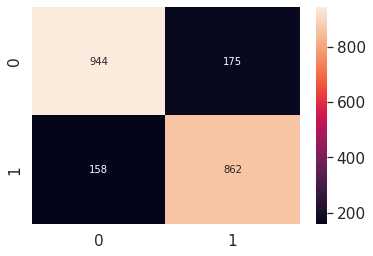

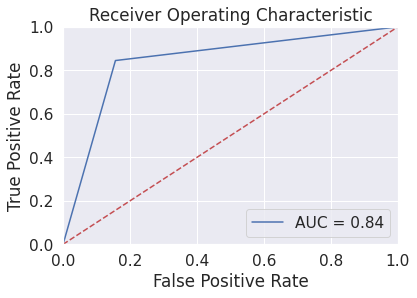

In [29]:
y_pred = dt_grid_uni.predict(X_test_uni)

print(metrics.classification_report(y_test, y_pred,  digits=5))
plot_confussion_matrix(y_test, y_pred)
plot_roc_curve(y_test, y_pred)

TFIDF Bigram: 

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf=TfidfVectorizer(ngram_range=(2,2))

X_train_bi = tf.fit_transform(X_train)
X_test_bi = tf.transform(X_test)

In [16]:
dt_bi = DecisionTreeClassifier()
dt_bi.fit(X_train_bi, y_train)
y_pred = dt_bi.predict(X_test_bi)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.70      0.78      1119
           1       0.73      0.91      0.81      1020

    accuracy                           0.80      2139
   macro avg       0.81      0.80      0.80      2139
weighted avg       0.82      0.80      0.80      2139

[[779 340]
 [ 93 927]]


TFIDF Bigram with grid: 

In [21]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import GridSearchCV

tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
dt_grid_bi = GridSearchCV(dt_bi, tree_para, cv=5,verbose=1)

In [22]:
dt_grid_bi.fit(X_train_bi,y_train)
print("train score:", dt_grid_bi.score(X_train_bi, y_train))
print("test score:", dt_grid_bi.score(X_test_bi, y_test))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
train score: 0.8179127725856697
test score: 0.7452080411407199


In [23]:
dt_grid_bi.best_params_

{'criterion': 'gini', 'max_depth': 150}

              precision    recall  f1-score   support

           0    0.92964   0.55496   0.69502      1119
           1    0.66145   0.95392   0.78121      1020

    accuracy                        0.74521      2139
   macro avg    0.79555   0.75444   0.73812      2139
weighted avg    0.80175   0.74521   0.73612      2139



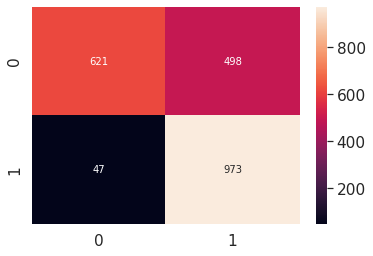

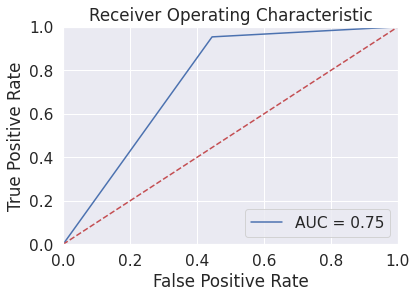

In [31]:
y_pred = dt_grid_bi.predict(X_test_bi)

print(metrics.classification_report(y_test, y_pred,  digits=5))
plot_confussion_matrix(y_test, y_pred)
plot_roc_curve(y_test, y_pred)

**Visualizing the final Decision Tree (TFIDF unigram through grid search)**

In [36]:
dt_final = DecisionTreeClassifier(criterion = 'gini', max_depth = 150)

In [38]:
dt_final.fit(X_train_uni,y_train)
print("train score:", dt_final.score(X_train_uni, y_train))
print("test score:", dt_final.score(X_test_uni, y_test))

train score: 1.0
test score: 0.8475923328658251


              precision    recall  f1-score   support

           0    0.85882   0.84808   0.85342      1119
           1    0.83559   0.84706   0.84129      1020

    accuracy                        0.84759      2139
   macro avg    0.84721   0.84757   0.84735      2139
weighted avg    0.84774   0.84759   0.84763      2139



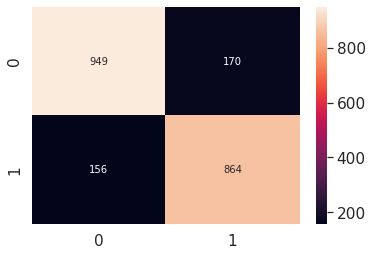

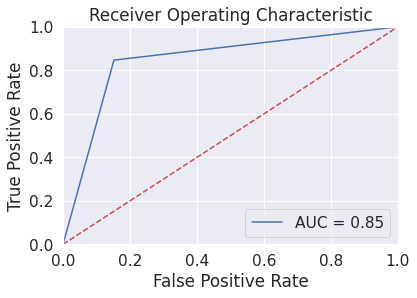

In [39]:
y_pred = dt_final.predict(X_test_uni)

print(metrics.classification_report(y_test, y_pred,  digits=5))
plot_confussion_matrix(y_test, y_pred)
plot_roc_curve(y_test, y_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


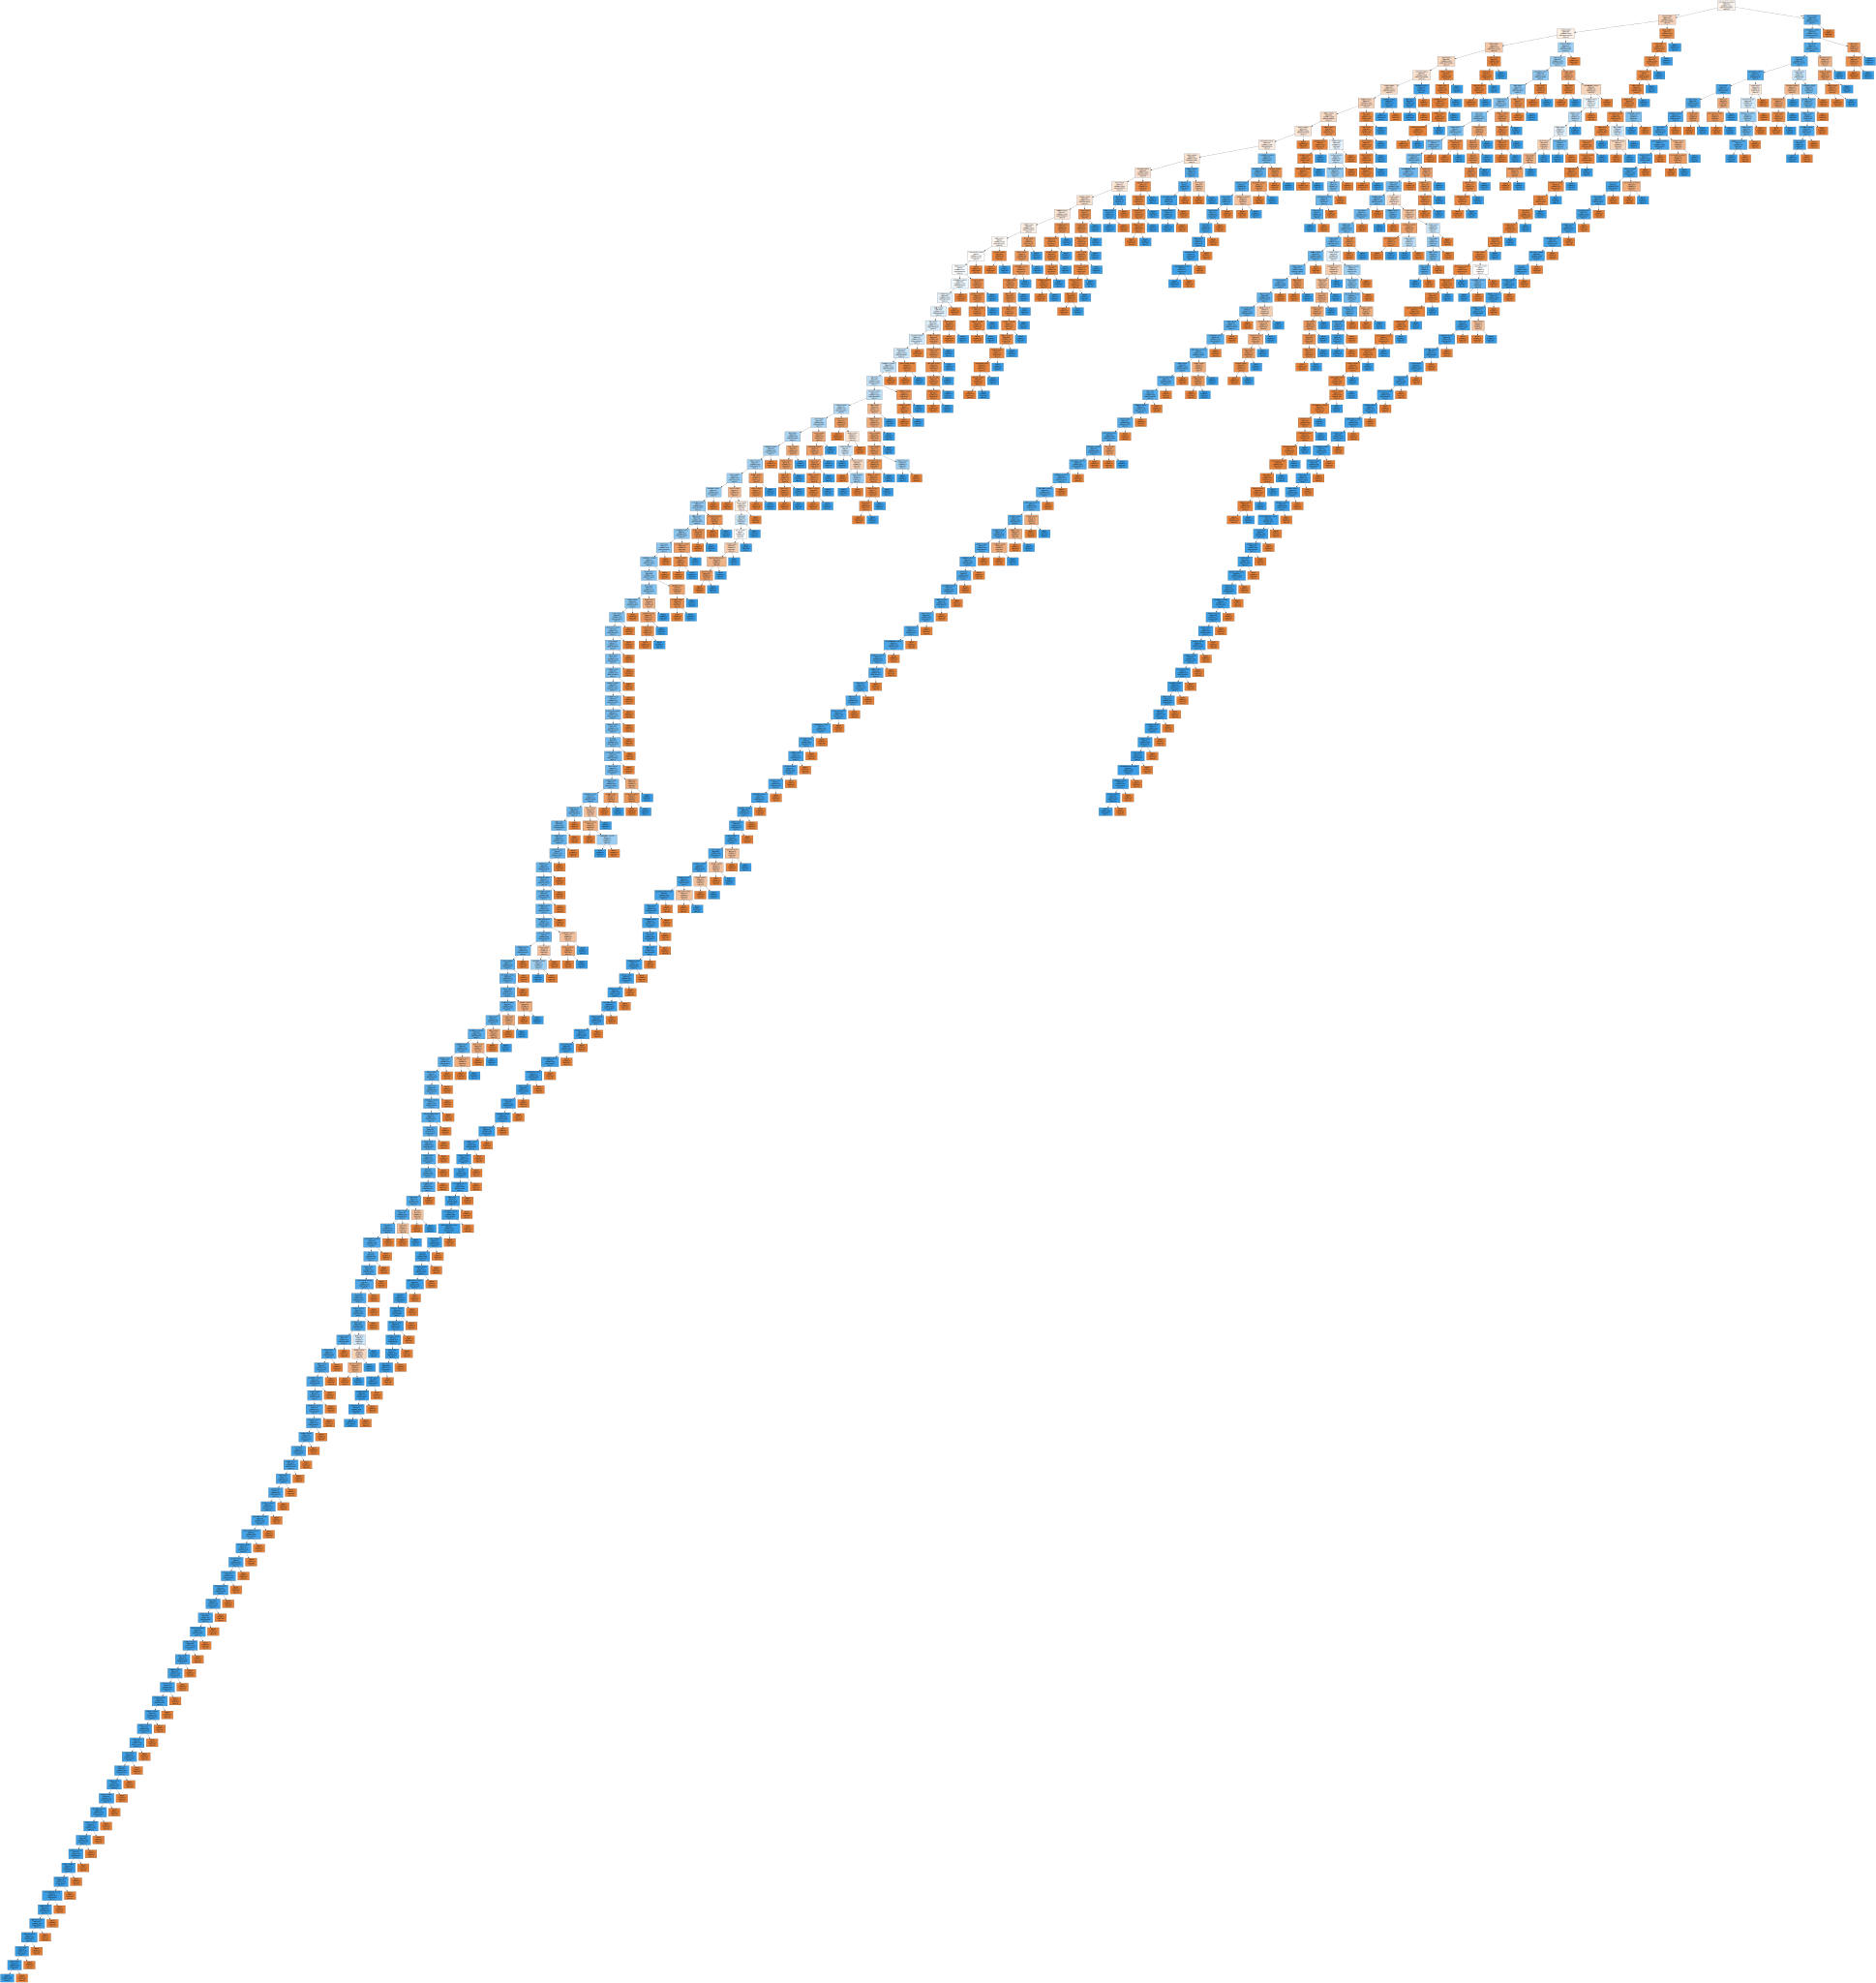

In [40]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
graph = Source(
    tree.export_graphviz(
        dt_final,
        out_file=None,
        feature_names=tf.get_feature_names(),
        class_names=['0','1'],
        filled = True)
)
display(SVG(graph.pipe(format='svg')))

In [ ]:
f.write(t._repr_svg_())